# Projeto 2 - Ciência dos Dados

Nome: Eduardo Janes Vescovi <br />
Nome: Fabio Dotoli Ferreira Filho <br />
Nome: José Rafael Martins Fernandes <br />
Nome: Lucca Barufatti Velini Sanches

## Proposta do projeto:

### Carregando algumas bibliotecas:

In [307]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import re
import sklearn
from math import *
from IPython.display import display
pd.options.display.max_rows = 13

### Localizando o arquivo

In [308]:
filename = 'car.data'
if filename in os.listdir():
    print(f'Encontrei o arquivo {filename}, tudo certo para prosseguir com o projeto!')
else:
    print(f'Não encontrei o arquivo {filename} aqui no diretório {os.getcwd()}, será que você não baixou o arquivo?')

Encontrei o arquivo car.data, tudo certo para prosseguir com o projeto!


### Carregando o arquivo

In [309]:
nomes_colunas = ['Buying', 'Maint', 'Doors', 'Capacity', 'Lug_boot', 'Safety', 'Car_acceptability']
cars = pd.read_csv(filename, names=nomes_colunas)
cars

,Buying,Maint,Doors,Capacity,Lug_boot,Safety,Car_acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


### Análise Exploratória Inicial

In [310]:
#Colunas do dataset
buying = cars.Buying
maint = cars.Maint
doors = cars.Doors
capacity = cars.Capacity
lug_boot = cars.Lug_boot
safety = cars.Safety
car_acceptability = cars.Car_acceptability

med      432
high     432
vhigh    432
low      432
Name: Buying, dtype: int64

med      0.25
high     0.25
vhigh    0.25
low      0.25
Name: Buying, dtype: float64

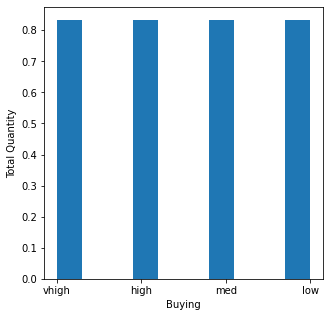

In [311]:
#Buying
display(buying.value_counts()) 
display(buying.value_counts(True))
 
plt.figure(figsize=(5, 5))

plt.hist(buying, density = True)
plt.xlabel('Buying')
plt.ylabel('Total Quantity')
plt.show()

med      432
high     432
vhigh    432
low      432
Name: Maint, dtype: int64

med      0.25
high     0.25
vhigh    0.25
low      0.25
Name: Maint, dtype: float64

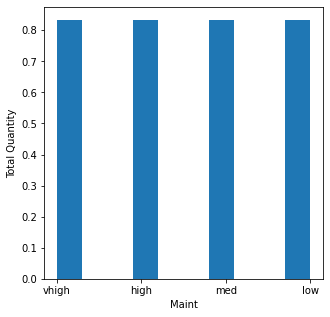

In [312]:
#Maint
display(maint.value_counts()) 
display(maint.value_counts(True))

plt.figure(figsize=(5, 5))

plt.hist(maint, density = True)
plt.xlabel('Maint')
plt.ylabel('Total Quantity')
plt.show()

3        432
5more    432
4        432
2        432
Name: Doors, dtype: int64

3        0.25
5more    0.25
4        0.25
2        0.25
Name: Doors, dtype: float64

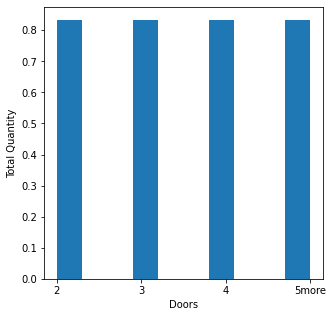

In [313]:
#Doors
display(doors.value_counts()) 
display(doors.value_counts(True))

plt.figure(figsize=(5, 5))

plt.hist(doors, density = True)
plt.xlabel('Doors')
plt.ylabel('Total Quantity')
plt.show()

4       576
more    576
2       576
Name: Capacity, dtype: int64

4       0.333333
more    0.333333
2       0.333333
Name: Capacity, dtype: float64

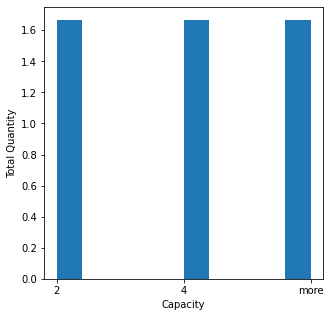

In [314]:
#Capacity
display(capacity.value_counts()) 
display(capacity.value_counts(True))

plt.figure(figsize=(5, 5))

plt.hist(capacity, density = True)
plt.xlabel('Capacity')
plt.ylabel('Total Quantity')
plt.show()

med      576
small    576
big      576
Name: Lug_boot, dtype: int64

med      0.333333
small    0.333333
big      0.333333
Name: Lug_boot, dtype: float64

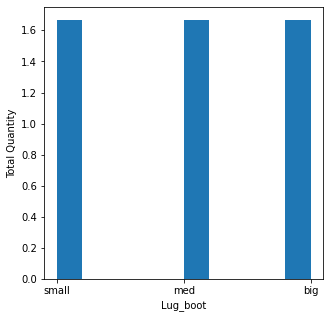

In [315]:
#Lug_boot
display(lug_boot.value_counts()) 
display(lug_boot.value_counts(True))

plt.figure(figsize=(5, 5))

plt.hist(lug_boot, density = True)
plt.xlabel('Lug_boot')
plt.ylabel('Total Quantity')
plt.show()

med     576
high    576
low     576
Name: Safety, dtype: int64

med     0.333333
high    0.333333
low     0.333333
Name: Safety, dtype: float64

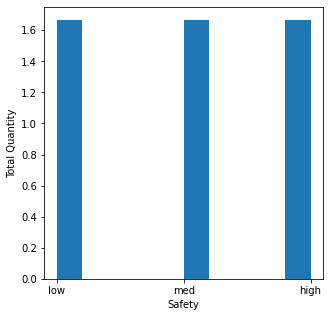

In [316]:
#Safety
display(safety.value_counts()) 
display(safety.value_counts(True))

plt.figure(figsize=(5, 5))

plt.hist(safety, density = True)
plt.xlabel('Safety')
plt.ylabel('Total Quantity')
plt.show()

unacc    1210
acc       384
good       69
vgood      65
Name: Car_acceptability, dtype: int64

unacc    0.700231
acc      0.222222
good     0.039931
vgood    0.037616
Name: Car_acceptability, dtype: float64

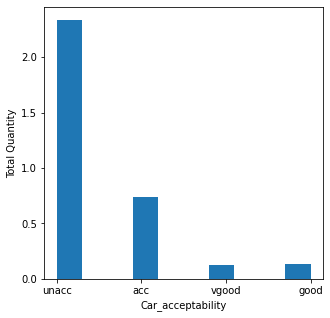

In [317]:
#Car_acceptability
display(car_acceptability.value_counts()) 
display(car_acceptability.value_counts(True))

plt.figure(figsize=(5, 5))

plt.hist(car_acceptability, density = True)
plt.xlabel('Car_acceptability')
plt.ylabel('Total Quantity')
plt.show()

### Iniciando classificação

In [318]:
buying_maint_dici = {'vhigh': '4', 'high': '3', 'med': '2', 'low': '1'}
doors_dici = {'5more': '5'}
capacity_dici = {'more': '3'}
lug_boot_dici = {'small': '1', 'med': '2', 'big': '3'}
safety_dici = {'low': '1', 'med': '2', 'high': '3'}
car_acceptability_dici = {'unacc':'1', 'acc':'2', 'good':'3', 'vgood':'4'}

cars['Buying'].replace(buying_maint_dici, inplace=True)
cars['Buying'] = cars['Buying'].astype(int)

cars['Maint'].replace(buying_maint_dici, inplace=True)
cars['Maint'] = cars['Maint'].astype(int)

cars['Doors'].replace(doors_dici, inplace=True)
cars['Doors'] = cars['Doors'].astype(int)

cars['Capacity'].replace(capacity_dici, inplace=True)
cars['Capacity'] = cars['Capacity'].astype(int)

cars['Lug_boot'].replace(lug_boot_dici, inplace=True)
cars['Lug_boot'] = cars['Lug_boot'].astype(int)

cars['Safety'].replace(safety_dici, inplace=True)
cars['Safety'] = cars['Safety'].astype(int)

cars['Car_acceptability'].replace(car_acceptability_dici, inplace=True)
cars['Car_acceptability'] = cars['Car_acceptability'].astype(int)

cars

,Buying,Maint,Doors,Capacity,Lug_boot,Safety,Car_acceptability
0,4,4,2,2,1,1,1
1,4,4,2,2,1,2,1
2,4,4,2,2,1,3,1
3,4,4,2,2,2,1,1
4,4,4,2,2,2,2,1
...,...,...,...,...,...,...,...
1723,1,1,5,3,2,2,3
1724,1,1,5,3,2,3,4
1725,1,1,5,3,3,1,1
1726,1,1,5,3,3,2,3


In [319]:
variaveis_independentes = ['Buying', 'Maint', 'Doors', 'Capacity', 'Lug_boot', 'Safety']
x = cars[variaveis_independentes] 
y = car_acceptability

In [320]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.25, random_state=0)

In [321]:
modelo = sklearn.linear_model.LogisticRegression(solver='lbfgs', multi_class='ovr')

modelo.fit(x_train,y_train)

y_pre = modelo.predict(x_test)


In [322]:
matriz_conf = sklearn.metrics.confusion_matrix(y_test, y_pre)
matriz_conf

array([[ 56,   2,  41,   0],
       [ 16,   1,   4,   0],
       [ 10,   2, 283,   1],
       [ 13,   0,   0,   3]], dtype=int64)

In [323]:
print("Accuracy:", sklearn.metrics.accuracy_score(y_test, y_pre))
print("Precision:", sklearn.metrics.precision_score(y_test, y_pre, average='macro'))
print("Recall:", sklearn.metrics.recall_score(y_test, y_pre, average='macro'))

Accuracy: 0.7939814814814815
Precision: 0.6005696405648266
Recall: 0.4392141735891736


In [324]:
pd.DataFrame(y_pre, y_test).tail(10)

,0
Car_acceptability,
vgood,acc
unacc,unacc
unacc,unacc
unacc,unacc
vgood,vgood
unacc,unacc
unacc,unacc
acc,acc
unacc,unacc
